## **Arabic Dialect Identiﬁcation**

# **Install Dependencies**

In [ ]:
!pip install transformers
!pip install farasapy
!pip install pyarabic
!git clone https://github.com/aub-mind/arabert

# **Read Dataset**

In [ ]:
import pandas as pd
import requests
import re

In [ ]:
URL = 'https://recruitment.aimtechnologies.co/ai-tasks'
PATH = 'dialect_dataset.csv'

In [ ]:
dataIDs = pd.read_csv(PATH)
dataIDs.head()

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ


In [ ]:
dataIDs['id']= dataIDs['id'].astype(str)
dataIDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  object
 1   dialect  458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


In [ ]:
def readDataFromAPI(data):
  headers={'id':'text'}
  result = requests.post(URL, headers=headers, json=data)
  return result.json()

def convertJson2Dataframe(dataJson):
  dic={'id':[],'text':[] }
  for k in dataJson:
    dic['id'].append(k)
    dic['text'].append(dataJson[k])
  return pd.DataFrame(dic)

In [ ]:
i = 0 
DF = pd.DataFrame([] ,  columns = ['id', 'text'])
while True:
  df_data = convertJson2Dataframe(readDataFromAPI(list(dataIDs['id'][i:i+1000])))
  DF = pd.concat([DF, df_data])
  i+=1000
  if len(dataIDs['id']) - i < 1000:
    df_data = convertJson2Dataframe(readDataFromAPI(list(dataIDs['id'][i:])))
    DF = pd.concat([DF,df_data ])
    break
DF.head(5)

,id,text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
allData =pd.merge(dataIDs, DF, on="id")
allData.head(5)

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
allData.to_csv('Data.csv', columns=['id','dialect','text'], index=False)

# **Clean Dataset**

In [ ]:
df = pd.read_csv('Data.csv',lineterminator='\n')
df.head(5)

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [ ]:
df[df.duplicated()==True]

,id,dialect,text


In [ ]:
df['text'] = df['text'].apply(lambda x : re.sub(r'\s*[@]+\w+\s*', '', x))
df['text'] = df['text'].apply(lambda x : re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""),'', x))
df['text'] .head()

0                           لكن بالنهاية  ينتفض  يغير 
1    يعني هذا محسوب على البشر  حيونه ووحشيه  وتطلبو...
2                                  مبين من كلامه خليجي
3                           يسلملي مرورك وروحك الحلوه💐
4                            وين هل الغيبه  اخ محمد 🌸🌺
Name: text, dtype: object

In [ ]:
from arabert.preprocess import ArabertPreprocessor
model_name = "bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100%|██████████| 241M/241M [00:13<00:00, 18.0MiB/s]


[2022-03-08 16:31:49,070 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
df['text'] = df['text'].apply(lambda x: arabert_prep.preprocess(x))
df.head(5)

,id,dialect,text
0,1175358310087892992,IQ,لكن ب+ ال+ نهاي +ة ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على ال+ بشر حي +ون +ه و+ وحشي +...
2,1175450108898565888,IQ,مبين من كلام +ه خليجي
3,1175471073770573824,IQ,يسلملي مرور +ك و+ روح +ك ال+ حلوه
4,1175496913145217024,IQ,وين هل ال+ غيبه أخ محمد


In [ ]:
df['text'] = df['text'].apply(lambda x: arabert_prep.unpreprocess(x))
df.head(5)

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه أخ محمد


In [ ]:
df.to_csv('clean_data.csv', columns=['id','dialect','text'], index=False)

# **Preprocessing Data**

In [ ]:
import pandas as pd
dataDF = pd.read_csv('clean_data.csv',lineterminator='\n')
dataDF.head(5)

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه أخ محمد


In [ ]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458085 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [ ]:
df = dataDF.dropna()

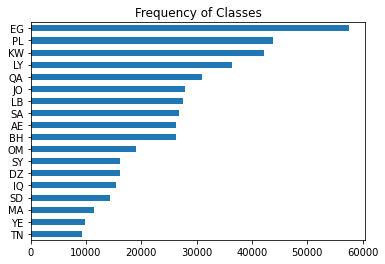

In [ ]:
import matplotlib.pyplot as plt

df["dialect"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458085 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458085 non-null  int64 
 1   dialect  458085 non-null  object
 2   text     458085 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.0+ MB


In [ ]:
df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [ ]:
encode={'IQ':0, 'LY':1, 'QA':2, 'PL':3, 'SY':4, 'TN':5, 'JO':6, 'MA':7, 'SA':8, 'YE':9, 'DZ':10,
       'EG':11, 'LB':12, 'KW':13, 'OM':14, 'SD':15, 'AE':16, 'BH':17}

df['label'] = df['dialect'].map(encode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [ ]:
from transformers import BertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model     = BertModel.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Take a part of data because it takes more time to run.

In [ ]:
from sklearn.model_selection import train_test_split

_, part_df = train_test_split(df, test_size=0.035, stratify=df['label'], random_state=42)

In [ ]:
part_df.shape

(16033, 4)

In [ ]:
import numpy as np

input_ids=[]
attention_mask=[]
label=[]
for txt ,out in zip(part_df['text'],part_df['label']):
  token = tokenizer(txt, return_tensors='pt')
  input_ids.append(token['input_ids'])
  attention_mask.append(token['attention_mask'])
  label.append(out)



In [ ]:
hidden_state=[]
for i,j in zip(input_ids,attention_mask):
  token = {'input_ids':i,'attention_mask':j }
  outputs   = model(**token).last_hidden_state
  features  = outputs[:,0].detach().numpy()
  hidden_state.append(features)


In [ ]:
final = pd.DataFrame({'hidden_state':hidden_state, 'label':label})

# **Build Models**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final['hidden_state'], final['label'], test_size=0.1, stratify=label, random_state=42)

In [ ]:
Xtrain=np.zeros((len(X_train),1024))
for i in range(len(X_train)):
  Xtrain[i]=X_train.iloc[i][:]
Xtrain.shape

(14429, 1024)

In [ ]:
Xtest=np.zeros((len(X_test),1024))
for i in range(len(X_test)):
  Xtest[i]=X_test.iloc[i][:]
Xtest.shape

(1604, 1024)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(max_iter=3000).fit(Xtrain, y_train)
print(clf.score(Xtrain, y_train))
print(clf.score(Xtest, y_test))
print(classification_report(y_test,clf.predict(Xtest))) 

0.4097304040474045
0.19887780548628428
              precision    recall  f1-score   support

           0       0.03      0.02      0.02        54
           1       0.19      0.24      0.21       128
           2       0.15      0.16      0.15       109
           3       0.20      0.29      0.24       153
           4       0.03      0.02      0.02        57
           5       0.31      0.16      0.21        32
           6       0.12      0.07      0.09        98
           7       0.28      0.17      0.22        40
           8       0.12      0.10      0.10        94
           9       0.00      0.00      0.00        35
          10       0.19      0.11      0.13        57
          11       0.31      0.48      0.38       202
          12       0.23      0.20      0.21        97
          13       0.21      0.31      0.25       147
          14       0.09      0.06      0.07        67
          15       0.15      0.12      0.13        50
          16       0.16      0.12      0.1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(C=1.0, kernel='linear').fit(Xtrain, y_train)
print(svm_clf.score(Xtrain, y_train))
print(svm_clf.score(Xtest, y_test))
print(classification_report(y_test,svm_clf.predict(Xtest))) 

0.5572804768175202
0.18266832917705736
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.15      0.20      0.17       128
           2       0.15      0.20      0.18       109
           3       0.20      0.33      0.25       153
           4       0.06      0.04      0.04        57
           5       0.14      0.09      0.11        32
           6       0.12      0.08      0.10        98
           7       0.19      0.15      0.17        40
           8       0.13      0.13      0.13        94
           9       0.05      0.03      0.04        35
          10       0.20      0.12      0.15        57
          11       0.31      0.42      0.36       202
          12       0.18      0.13      0.15        97
          13       0.20      0.23      0.22       147
          14       0.10      0.06      0.07        67
          15       0.17      0.12      0.14        50
          16       0.12      0.08      0.0

DeepLearning LSTM Model

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
ytrain = to_categorical(y_train, num_classes=18)
ytest = to_categorical(y_test, num_classes=18)


In [ ]:
Xtrain= Xtrain.reshape(Xtrain.shape[0],1, Xtrain.shape[1])
Xtest= Xtest.reshape(Xtest.shape[0],1, Xtest.shape[1])

In [ ]:
epochs = 20
batch_size = 8

model = Sequential()
model.add(LSTM(128,activation='relu', input_shape=Xtrain.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dense(18, activation='softmax'))
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, monitor='val_acc', mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(Xtrain, ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_acc',patience=5),checkpointer])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 128)               590336    
                                                                 
 dense_39 (Dense)            (None, 100)               12900     
                                                                 
 dense_40 (Dense)            (None, 18)                1818      
                                                                 
Total params: 605,054
Trainable params: 605,054
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1434/1443 [============================>.] - ETA: 0s - loss: 2.7802 - acc: 0.1206
Epoch 1: val_acc improved from -inf to 0.12405, saving model to weights.hdf5
1443/1443 [==============================] - 51s 33ms/step - loss: 2.7802 - acc: 0.1206 - val_loss: 2.7636 - val_acc: 0.1240
Epoch 2/20


In [ ]:
accr = model.evaluate(Xtrain,ytrain)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

451/451 [==============================] - 1s 3ms/step - loss: 2.6055 - acc: 0.1813
Train set
  Loss: 2.606
  Accuracy: 0.181


In [ ]:
accr = model.evaluate(Xtest,ytest)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

51/51 [==============================] - 0s 3ms/step - loss: 2.6803 - acc: 0.1677
Test set
  Loss: 2.680
  Accuracy: 0.168
